In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [65]:
#Load data file
orders = pd.read_excel('Dataset.xlsx')
orders

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135


In [66]:
#Column info (Check type + NA value)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [67]:
#Load data from "Return" sheet
returned = pd.read_excel('Dataset.xlsx', sheet_name='Return')
returned

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [68]:
#Remove returned orders
orders2 = orders.merge(returned, how="left", on="Order ID").reset_index()
success_orders = orders2[orders2.Returned.isna()]
success_orders

,index,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
6,6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,NaN
9990,9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,NaN
9991,9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,NaN
9992,9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,NaN


In [69]:
#Calculate Profit
success_orders['Profit'] = success_orders['Sales'] - (success_orders['Quantity']*success_orders['Unit Cost'])
success_orders

/var/folders/7g/9s15qvk967dbqjkf9fgylpd80000gn/T/ipykernel_967/2648350142.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned,Profit
0,0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN,56.5110
1,1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN,12.1176
2,2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN,2.7279
3,3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN,19.7910
6,6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN,-0.6048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,NaN,4.8840
9990,9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,NaN,4.2717
9991,9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,NaN,-64.7748
9992,9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,NaN,-5.4870


In [70]:
#Calculate RFM
#Recency
max_orderdate = success_orders.groupby('Customer ID')['Order Date'].max().reset_index()
max_orderdate.columns = ['Customer ID', 'Max Order Date']
max_orderdate

,Customer ID,Max Order Date
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2016-09-04
4,AB-10015,2016-11-10
...,...,...
786,XP-21865,2017-10-09
787,YC-21895,2017-12-26
788,YS-21880,2017-12-21
789,ZC-21910,2017-11-06


In [71]:
import datetime
current_date = datetime.datetime(2017,12,31)
max_orderdate ['Recency']  = (current_date - max_orderdate['Max Order Date']).dt.days
max_orderdate

,Customer ID,Max Order Date,Recency
0,AA-10315,2017-06-29,185
1,AA-10375,2017-12-11,20
2,AA-10480,2017-04-15,260
3,AA-10645,2016-09-04,483
4,AB-10015,2016-11-10,416
...,...,...,...
786,XP-21865,2017-10-09,83
787,YC-21895,2017-12-26,5
788,YS-21880,2017-12-21,10
789,ZC-21910,2017-11-06,55


In [72]:
#Frequency
order_fre = success_orders.groupby('Customer ID')['Order ID'].nunique().reset_index()
order_fre.columns = ['Order ID', 'Frequency']
order_fre

,Order ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,5
4,AB-10015,3
...,...,...
786,XP-21865,9
787,YC-21895,4
788,YS-21880,8
789,ZC-21910,12


In [73]:
#Monetary
rfm_cal = success_orders.groupby(['Customer ID']).agg(
    {'Order Date': lambda x: (current_date - x.max()).days,
    'Order ID': 'nunique',
    "Sales":'sum',
    'Quantity':'sum',
    'Profit':'sum'}
)
rfm_cal

,Order Date,Order ID,Sales,Quantity,Profit
Customer ID,,,,,
AA-10315,185,5,5563.560,30,-362.8825
AA-10375,20,9,1056.390,41,277.3824
AA-10480,260,4,1790.512,36,435.8274
AA-10645,483,5,5073.975,62,851.5825
AB-10015,416,3,886.156,13,129.3465
...,...,...,...,...,...
XP-21865,83,9,2110.726,89,629.7550
YC-21895,5,4,5438.650,26,1298.5640
YS-21880,10,8,6720.444,58,1778.2923


In [74]:
#Rename columns
rfm_cal.rename(columns={'Order Date':'Recency','Order ID':'Frequency','Sales':'Monetary'}, inplace=True)
rfm_cal

,Recency,Frequency,Monetary,Quantity,Profit
Customer ID,,,,,
AA-10315,185,5,5563.560,30,-362.8825
AA-10375,20,9,1056.390,41,277.3824
AA-10480,260,4,1790.512,36,435.8274
AA-10645,483,5,5073.975,62,851.5825
AB-10015,416,3,886.156,13,129.3465
...,...,...,...,...,...
XP-21865,83,9,2110.726,89,629.7550
YC-21895,5,4,5438.650,26,1298.5640
YS-21880,10,8,6720.444,58,1778.2923


In [75]:
#Calculate quintiles
rfm_cal['Rec_score'] = pd.qcut(rfm_cal['Recency'],5,[5,4,3,2,1])
rfm_cal['Fre_score'] = pd.qcut(rfm_cal['Frequency'],5,[1,2,3,4,5])
rfm_cal['Mon_score'] = pd.qcut(rfm_cal['Monetary'],5,[1,2,3,4,5])
rfm_cal

,Recency,Frequency,Monetary,Quantity,Profit,Rec_score,Fre_score,Mon_score
Customer ID,,,,,,,,
AA-10315,185,5,5563.560,30,-362.8825,2,2,5
AA-10375,20,9,1056.390,41,277.3824,5,5,2
AA-10480,260,4,1790.512,36,435.8274,2,1,3
AA-10645,483,5,5073.975,62,851.5825,1,2,5
AB-10015,416,3,886.156,13,129.3465,1,1,2
...,...,...,...,...,...,...,...,...
XP-21865,83,9,2110.726,89,629.7550,3,5,3
YC-21895,5,4,5438.650,26,1298.5640,5,1,5
YS-21880,10,8,6720.444,58,1778.2923,5,4,5


In [76]:
#RFM score segmentation
rfm_cal['RFM_score'] = rfm_cal['Rec_score'].astype(str) + rfm_cal['Fre_score'].astype(str) + rfm_cal['Mon_score'].astype(str)
rfm_cal['RFM_score'] = pd.to_numeric(rfm_cal['RFM_score'])
rfm_cal

,Recency,Frequency,Monetary,Quantity,Profit,Rec_score,Fre_score,Mon_score,RFM_score
Customer ID,,,,,,,,,
AA-10315,185,5,5563.560,30,-362.8825,2,2,5,225
AA-10375,20,9,1056.390,41,277.3824,5,5,2,552
AA-10480,260,4,1790.512,36,435.8274,2,1,3,213
AA-10645,483,5,5073.975,62,851.5825,1,2,5,125
AB-10015,416,3,886.156,13,129.3465,1,1,2,112
...,...,...,...,...,...,...,...,...,...
XP-21865,83,9,2110.726,89,629.7550,3,5,3,353
YC-21895,5,4,5438.650,26,1298.5640,5,1,5,515
YS-21880,10,8,6720.444,58,1778.2923,5,4,5,545


In [77]:
#Load segment data
seg = pd.read_excel('Dataset.xlsx', sheet_name='Segmentation')
seg

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [78]:
#Add segment data to list
seg['RFM Score'] = seg['RFM Score'].str.split(",")
seg

,Segment,RFM Score
0,Champions,"[555, 554, 544, 545, 454, 455, 445]"
1,Loyal,"[543, 444, 435, 355, 354, 345, 344, 335]"
2,Potential Loyalist,"[553, 551, 552, 541, 542, 533, 532, 531..."
3,New Customers,"[512, 511, 422, 421, 412, 411, 311]"
4,Promising,"[525, 524, 523, 522, 521, 515, 514, 513..."
5,Need Attention,"[535, 534, 443, 434, 343, 334, 325, 324]"
6,About To Sleep,"[331, 321, 312, 221, 213, 231, 241, 251]"
7,At Risk,"[255, 254, 245, 244, 253, 252, 243, 242..."
8,Cannot Lose Them,"[155, 154, 144, 214, 215, 115, 114, 113]"
9,Hibernating customers,"[332, 322, 233, 232, 223, 222, 132, 123..."


In [79]:
#Add refer table
refer_table = seg.set_index(["Segment"])['RFM Score'].apply(pd.Series).stack().reset_index().drop(columns='level_1').rename(columns={0: 'RFM_score'})
refer_table['RFM_score'] = pd.to_numeric(refer_table['RFM_score'])
refer_table

,Segment,RFM_score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [80]:
#Merge scores to appropriate segments
rfm_cal = rfm_cal.merge(refer_table, how="left", on="RFM_score").reset_index().drop(columns='index')
rfm_cal

,Recency,Frequency,Monetary,Quantity,Profit,Rec_score,Fre_score,Mon_score,RFM_score,Segment
0,185,5,5563.560,30,-362.8825,2,2,5,225,At Risk
1,20,9,1056.390,41,277.3824,5,5,2,552,Potential Loyalist
2,260,4,1790.512,36,435.8274,2,1,3,213,About To Sleep
3,483,5,5073.975,62,851.5825,1,2,5,125,At Risk
4,416,3,886.156,13,129.3465,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...,...
786,83,9,2110.726,89,629.7550,3,5,3,353,Potential Loyalist
787,5,4,5438.650,26,1298.5640,5,1,5,515,Promising
788,10,8,6720.444,58,1778.2923,5,4,5,545,Champions
789,55,12,7892.998,94,-1010.0031,4,5,5,455,Champions


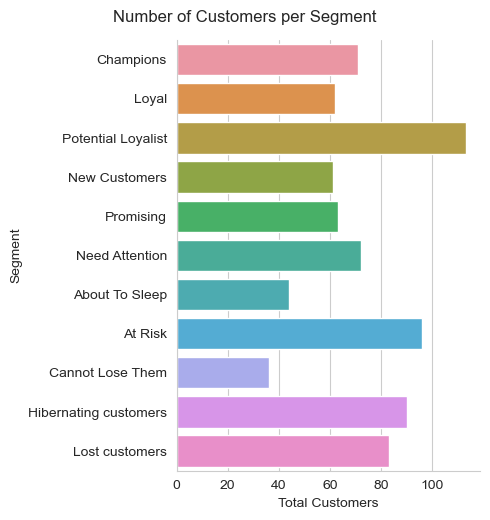

In [81]:
#Draw bar chart to show number of customers per segment
category_order = ['Champions', 
'Loyal',
'Potential Loyalist',
'New Customers',
'Promising',
'Need Attention',
'About To Sleep',
'At Risk',
'Cannot Lose Them',
'Hibernating customers',
'Lost customers']

sns.set_style("whitegrid")
g = sns.catplot(y="Segment", data=rfm_cal, orient='h', kind="count", order=category_order)
g.fig.suptitle("Number of Customers per Segment", y=1.03)
g.set(xlabel="Total Customers")
plt.show()

In [82]:
#Load data from "Product" sheet
product = pd.read_excel('Dataset.xlsx', sheet_name='Product')
product

,Row ID,Product ID,Category,Sub-Category,Product Name
0,1,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,2,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,3,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,4,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,5,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...,...
1889,1890,TEC-PH-10002817,Technology,Phones,RCA ViSYS 25425RE1 Corded phone
1890,1891,TEC-MA-10003589,Technology,Machines,Cisco 8961 IP Phone Charcoal
1891,1892,OFF-AP-10003099,Office Supplies,Appliances,"Eureka Hand Vacuum, Bagless"
1892,1893,TEC-PH-10002645,Technology,Phones,LG G2


In [83]:
#Merge "product" vs. "success_orders"
order3 = success_orders.merge(product, how="left", on="Product ID").reset_index()

In [84]:
#Calculate Revenue per Channel and Category
chan = order3.groupby(['Channel']).agg(
    {'Sales':'sum'}).reset_index()

cat = order3.groupby(['Category']).agg(
    {'Sales':'sum'}).reset_index()

In [85]:
#Revenue per Channel and Category
import plotly.express as px
import plotly

fig = px.pie(chan, values= 'Sales', names= 'Channel', title = 'Revenue per Channel')
fig.show()

fig = px.pie(cat, values= 'Sales', names= 'Category', title = 'Revenue per Category')
fig.show()

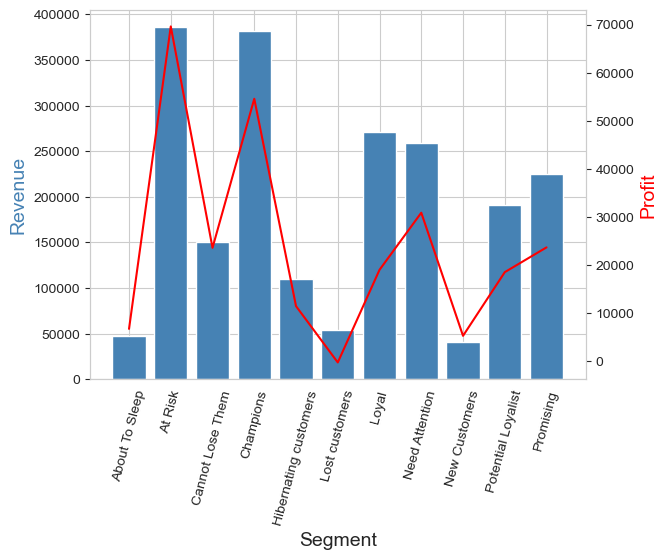

In [86]:
# Revenue and Profit per Segment
#Calculate rev_per_seg
rev_per_seg = rfm_cal.groupby(['Segment']).agg(
    {'Monetary':'sum',
     'Profit':'sum'}).reset_index()

#Draw chart
x = rev_per_seg['Segment']
y1 = rev_per_seg['Monetary']
y2 = rev_per_seg['Profit']


col1 = 'steelblue'
col2 = 'red'

fig,ax = plt.subplots()

ax.bar(x, y1, color=col1)


ax.set_xlabel('Segment', fontsize=14)
plt.xticks(rotation=75)

ax.set_ylabel('Revenue', color=col1, fontsize=14)


ax2 = ax.twinx()


ax2.plot(x, y2, color=col2)

ax2.set_ylabel('Profit', color=col2, fontsize=14)
plt.grid(False)
plt.show()

In [87]:
time = success_orders.loc[:,['Order Date', 'Sales']]
time['Year'] = time['Order Date'].dt.year 
time['Month'] = time['Order Date'].dt.month 
time

,Order Date,Sales,Year,Month
0,2017-12-30,209.300,2017,12
1,2017-12-30,323.136,2017,12
2,2017-12-30,90.930,2017,12
3,2017-12-30,52.776,2017,12
6,2017-12-30,3.024,2017,12
...,...,...,...,...
9989,2014-01-05,19.536,2014,1
9990,2014-01-04,11.784,2014,1
9991,2014-01-04,272.736,2014,1
9992,2014-01-04,3.540,2014,1


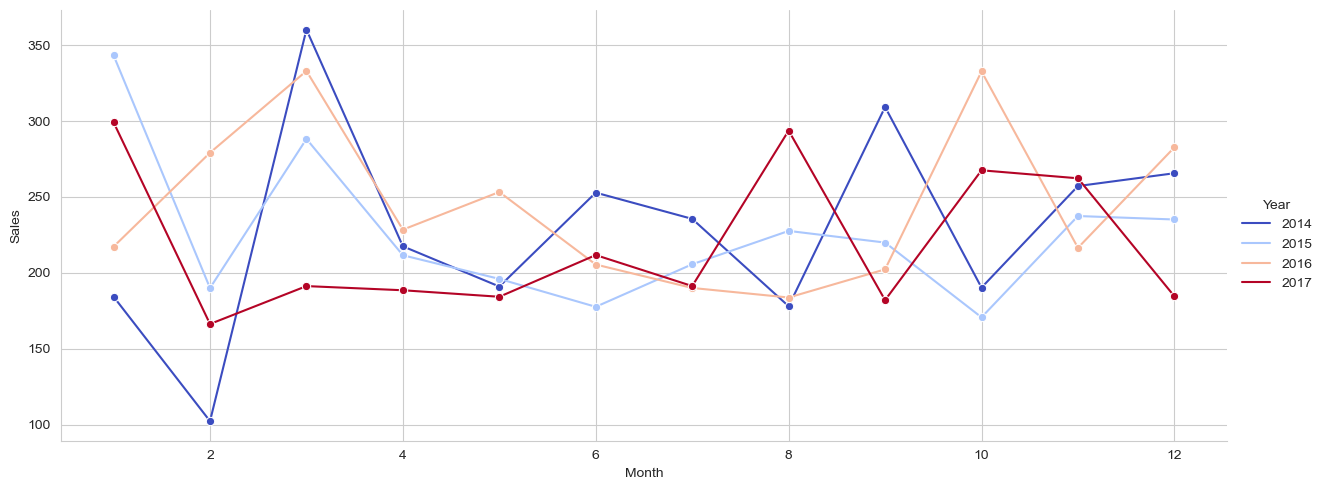

In [88]:
line = sns.relplot(kind='line', data=time, x='Month', y='Sales', hue='Year', aspect=2.5, marker='o', ci=None, palette=sns.color_palette('coolwarm', as_cmap = True))
plt.show()